# **Background**

For this drill, we will analyze two separate datasets. First we will examine honey production for each state in the US during the year 2012. Then, we will look at HR employee attrition data provided by IBM.

In [604]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from collections import Counter
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

honey_production = pd.read_csv('honeyproduction_2012.csv')

honey_production.columns = ['state',
                            'numcol',
                            'yieldpercol',
                            'totalprod',
                            'stocks',
                            'priceperlb',
                            'prodvalue']


columns_float = ['numcol',
                'yieldpercol',
                'totalprod',
                'stocks',
                'priceperlb',
                'prodvalue']

honey_production[columns_float] = honey_production[columns_float].astype(float)

honey_production.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,AL,8000.0,54.0,432000.0,65000.0,2.47,1067000.0
1,AZ,22000.0,46.0,1012000.0,253000.0,1.79,1811000.0
2,AR,25000.0,63.0,1575000.0,189000.0,1.98,3119000.0
3,CA,330000.0,35.0,11550000.0,3119000.0,1.94,22407000.0
4,CO,25000.0,48.0,1200000.0,468000.0,2.07,2484000.0


# **Choose one variable and plot that variable four different ways**


First, we will plot the total honey produced in each state, four different ways.

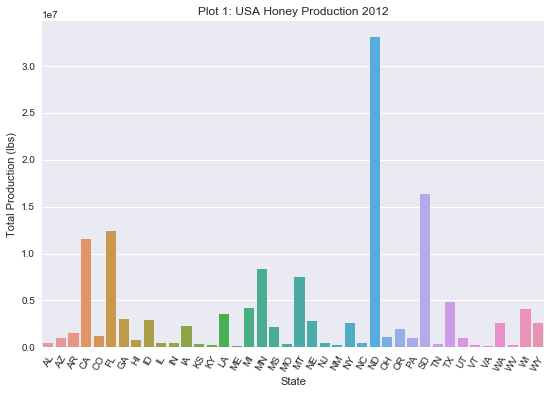

In [605]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=60)
sns.set(style="darkgrid")
g = sns.barplot(data = honey_production, x="state", y="totalprod")
g.set(xlabel="State", ylabel="Total Production (lbs)", title="Plot 1: USA Honey Production 2012")
plt.show()

The bar plot clearly conveys the differences in the amount of honey production between the distinct states. However, the information it conveys is limited in scope; for example, we cannot easily tell the mean of the production values from this plot.

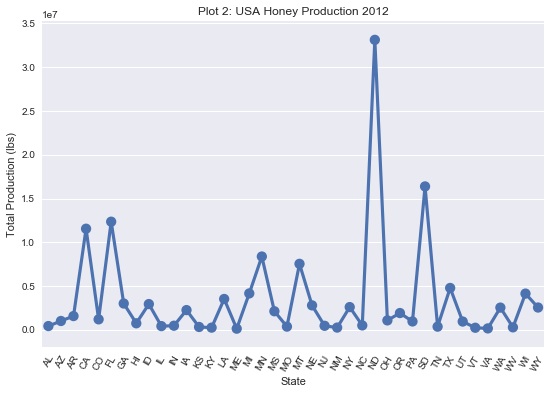

In [606]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=60)
sns.set(style="darkgrid")
g = sns.pointplot(data=honey_production, x="state", y="totalprod")
g.set(xlabel="State", ylabel="Total Production (lbs)", title="Plot 2: USA Honey Production 2012")
plt.show()

Similarly to the bar plot, the point plot relays the differences in total honey production amounts between the states, but fails to convey any more information beyond that.

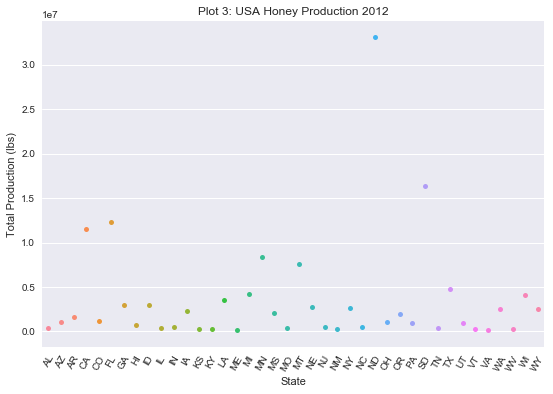

In [607]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=60)
sns.set(style="darkgrid")
g = sns.swarmplot(data = honey_production, x = "state", y="totalprod")
g.set(xlabel="State", ylabel="Total Production (lbs)", title="Plot 3: USA Honey Production 2012")
plt.show()

The swarm plot is again simply another iteration of the first two plots above, just in a different form. However, in this plot it may be a little difficult to correlate some of the data points with their corresponding state, since there are many data points bunched together. Thus, a bar plot or point plot would be a better option to visualize this data.

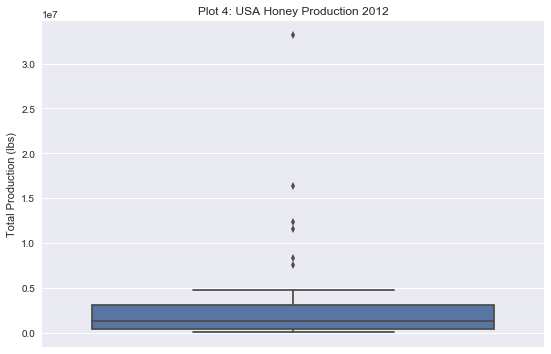

In [608]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=60)
sns.set(style="darkgrid")
g = sns.boxplot(data=honey_production, y="totalprod")
g.set(xlabel="", ylabel="Total Production (lbs)", title="Plot 4: USA Honey Production 2012")
plt.show()

The box plot helps us see the distribution of the data, as well as the central tendency. We can also see outliers in the data. There appear to be around six outliers, which is consistent with the first three plots above.

# **Choose two continuous variables, and plot them three different ways**

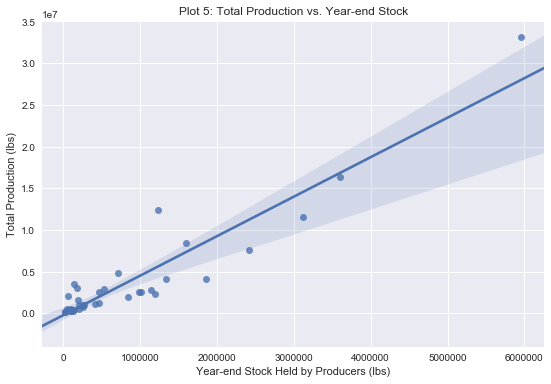

In [609]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
g = sns.regplot(data=honey_production, x="stocks", y="totalprod")
g.set(xlabel="Year-end Stock Held by Producers (lbs)", ylabel="Total Production (lbs)", title="Plot 5: Total Production vs. Year-end Stock")
plt.show()

Plot 5 is a regression plot showing the relationship between the total production and the year-end stocks held by producers. We can clearly see that there is a positive relationship between the two variables, i.e. the more honey a state produces, the more stocks of honey it is holding at the end of the year.

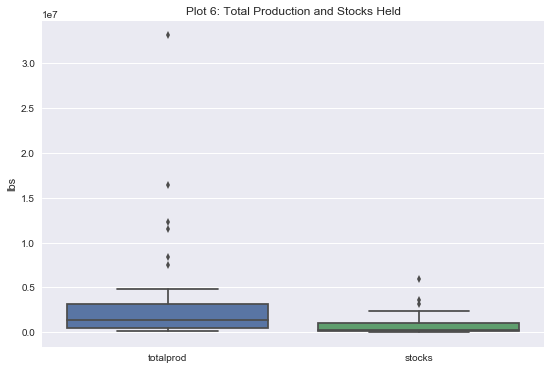

In [610]:
honey_production_1 = honey_production[["totalprod", "stocks"]]

plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
g = sns.boxplot(data=honey_production_1)
g.set(xlabel="", ylabel="lbs", title="Plot 6: Total Production and Stocks Held")
plt.show()

Plot 6 shows two box plots side-by-side: one for total production, and another for stocks held by producers at the end of the year. The box plots make sense, as the year-end stocks held by producers should always be less than or equal to the total production. However, it does not show the relationship between the two variables.

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


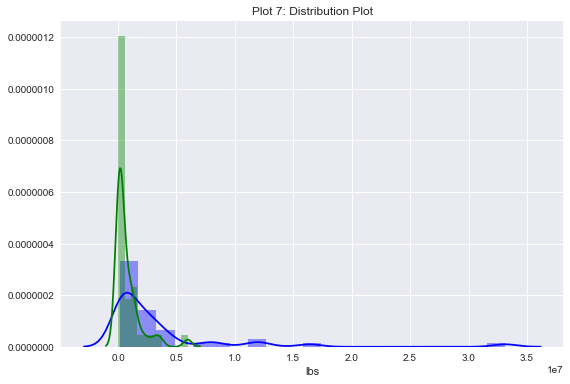

In [611]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
g = sns.distplot(honey_production_1["totalprod"], color="#0000ff")
g = sns.distplot(honey_production_1["stocks"], color="#008000", ax=g)
g.set(xlabel="lbs", ylabel="", title="Plot 7: Distribution Plot")
plt.show()

Plot 7 displays two normalized histograms on top of each other, again for the total production and year-end stocks held by producers. This plot visualizes the distributions of each variable, but just like the box plot, it does not show the relationship between the two variables.

# **Choose one continuous variable and one categorical variable, and plot them six different ways**

For this exercise we will use HR employee attrition data from IBM. We will choose education field as our categorical variable, and hourly pay as our continuous variable.

In [612]:
hr_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


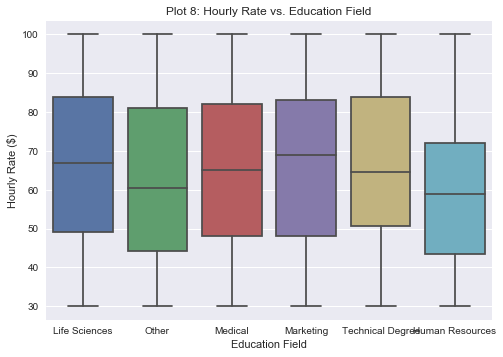

In [613]:
g = sns.boxplot(x="EducationField", y="HourlyRate", data=hr_data)
g.set(xlabel="Education Field", ylabel="Hourly Rate ($)", title="Plot 8: Hourly Rate vs. Education Field")
plt.show()

The box plots above are effective in conveying the distribution of hourly pay for each field of study. We can easily compare the median rates side by side, noting that the pay distribution for life sciences and technica degrees reach a little higher than the other fields.

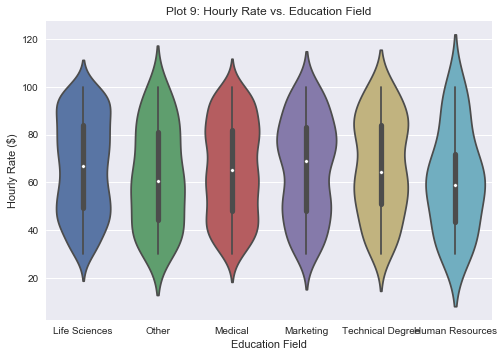

In [614]:
g = sns.violinplot(x="EducationField", y="HourlyRate", data=hr_data)
g.set(xlabel="Education Field", ylabel="Hourly Rate ($)", title="Plot 9: Hourly Rate vs. Education Field")
plt.show()

The violin plot is similar to the box plot in that it helps us visualize the distribution of the data. However, it adds another dimension that the box plot does not have - it enabls us to see how much data is in each range. For example, the wider parts of the violin plot will contain more data points that the narrower regions.

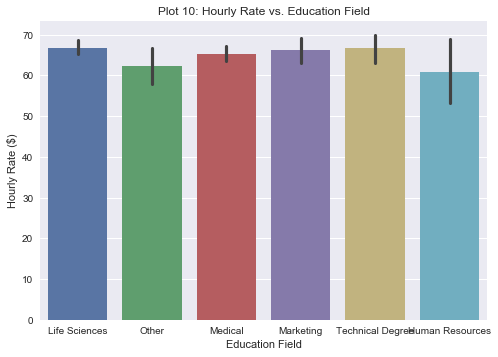

In [615]:
g = sns.barplot(x="EducationField", y="HourlyRate", data=hr_data)
g.set(xlabel="Education Field", ylabel="Hourly Rate ($)", title="Plot 10: Hourly Rate vs. Education Field")
plt.show()

We can also plot the hourly rate for each education field using a bar plot, as shown in plot 10 above. However, the bar plot mainly seems to convey the maximum of the range for each education field, and there isn't much useful information about the actual distribution of hourly pay for each education field. Thus, the box plot and violin plot shown above are better options.

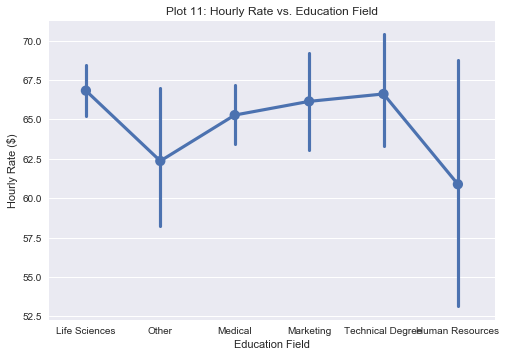

In [616]:
g = sns.pointplot(x="EducationField", y="HourlyRate", data=hr_data)
g.set(xlabel="Education Field", ylabel="Hourly Rate ($)", title="Plot 11: Hourly Rate vs. Education Field")
plt.show()

Plot 11 shows a point plot for the hourly rate in each education field. It conveys more information about the distribution for each categorical variable than the bar plot shown above; however, it is more simplistic than the box plot or violin plot, and does not convey as much useful information as those types of plots. Nonetheless, it is still a better option than using a bar plot.

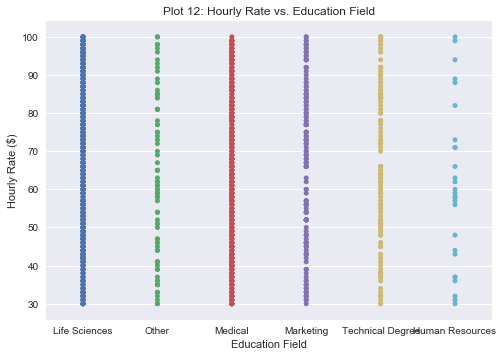

In [617]:
g = sns.stripplot(x="EducationField", y="HourlyRate", data=hr_data)
g.set(xlabel="Education Field", ylabel="Hourly Rate ($)", title="Plot 12: Hourly Rate vs. Education Field")
plt.show()

The strip plot in plot 12 above essentially displays a scatter plot for each categorical variable. This is useful for highlighting gaps in the data, i.e. regions where there are no datapoints. However, the drawback of this plot is that there is overlap between multiple data points at the same value of the continuous variable.

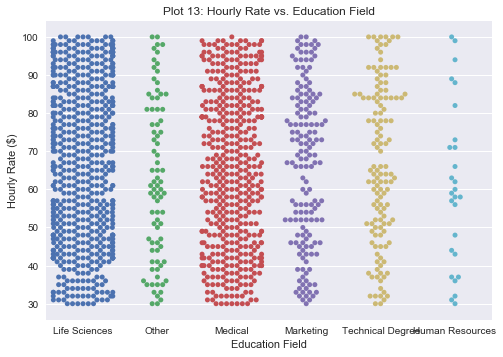

In [618]:
g = sns.swarmplot(x="EducationField", y="HourlyRate", data=hr_data)
g.set(xlabel="Education Field", ylabel="Hourly Rate ($)", title="Plot 13: Hourly Rate vs. Education Field")
plt.show()

The swarm plot in plot 13 above helps mend some of the issues with the strip plot; it is essentially a strip plot with non-overlapping data points. Thus, as with the violin plot, we can also visualize the "width" of the data.